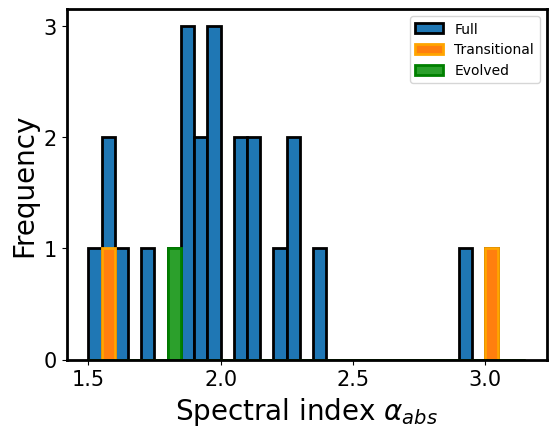

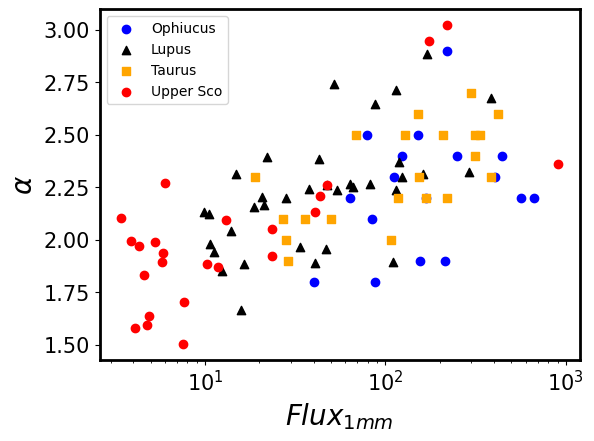

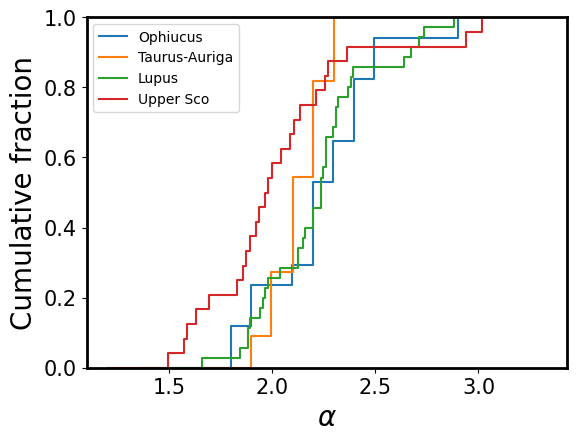

Upper_sco, Ophiucus KstestResult(statistic=0.45588235294117646, pvalue=0.021597017427386647)
Upper_sco, Taurus KstestResult(statistic=0.5357142857142857, pvalue=0.0017269211993544886)
Upper_sco, Lupus KstestResult(statistic=0.4226190476190476, pvalue=0.00819236989204072)
Upper_sco, Together KstestResult(statistic=0.4349315068493151, pvalue=0.0013364799317200726)


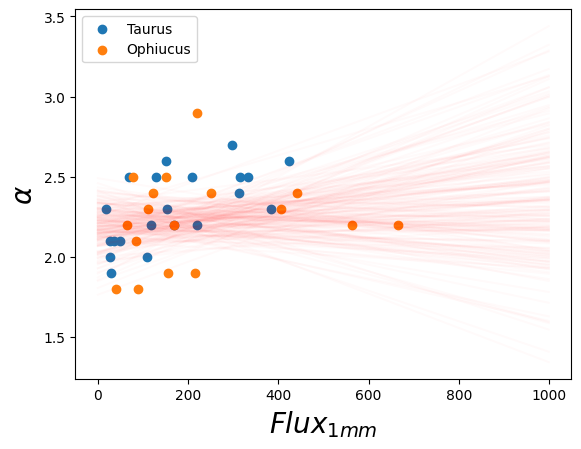

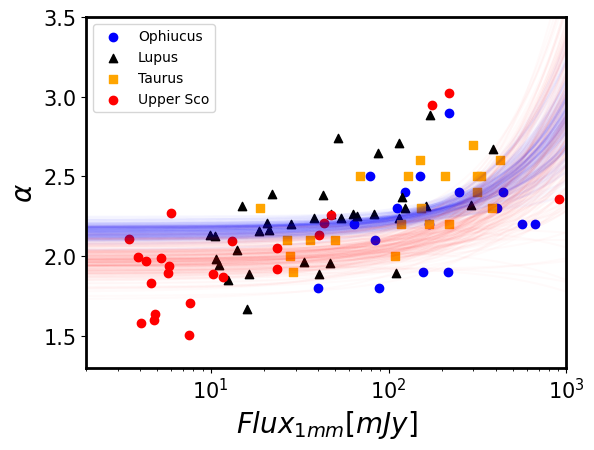

In [2]:
from linmix import linmix
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, ks_2samp
import random

from Cumulative_spectral_indices import flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, ricci_taurus_fluxes_1mm, spectral_indices_taurus, flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, flux_lupus_1_mm, tazzari_lupus_spectral_indices

xsig = [0.2] * 99
ysig = [0.2] * 99

log_flux_barenfeld_0_88mm_updated = [np.log10(x) for x in flux_barenfeld_0_88mm_updated]
log_ricci_taurus_fluxes_1mm = [np.log10(x) for x in ricci_taurus_fluxes_1mm]
log_flux_list_ophiucus_ricci_1mm = [np.log10(x) for x in flux_list_ophiucus_ricci_1mm]
log_flux_lupus_1_mm = [np.log10(x) for x in flux_lupus_1_mm]

In [3]:
class region_data():
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

lupus_data = region_data()
taurus_data = region_data()
ophiucus_data = region_data()
upper_sco_data = region_data()
total_sample_data = region_data()

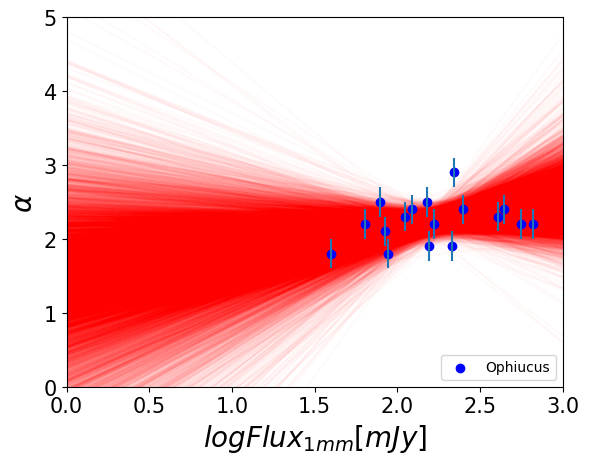

In [4]:
fig, ax = plt.subplots()

lm = linmix.LinMix(log_flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, xsig[:len(flux_list_ophiucus_ricci_1mm)], ysig[:len(flux_list_ophiucus_ricci_1mm)], K=2)
lm.run_mcmc(silent=True)

ophiucus_slope_flux_alpha = []
ophiucus_y_intercept_flux_alpha = []
ophiucus_scatter = []

xmin = 0
xmax = 800
xs = np.arange(xmin,xmax)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    ophiucus_slope_flux_alpha.append(lm.chain[i]['beta'])
    ophiucus_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    ophiucus_scatter.append(lm.chain[i]['sigsqr'])

plt.scatter(log_flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, label='Ophiucus', color='b', zorder=1)
plt.errorbar(log_flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, yerr=ysig[:len(flux_list_ophiucus_ricci_1mm)], ls='none', zorder=1)


plt.xlabel('$log Flux_{1mm}[mJy]$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.legend()
plt.xlim(0,3)
plt.ylim(0,5)
ax.tick_params(which='both', labelsize=15)
plt.show()

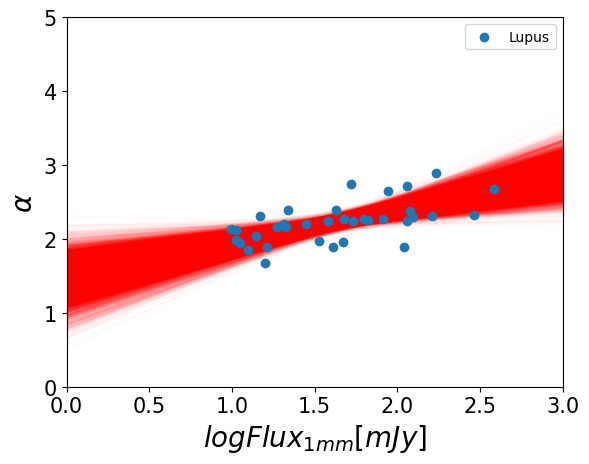

In [5]:
fig, ax = plt.subplots()

flux_lupus_1_mm = [np.log10(x) for x in flux_lupus_1_mm]
lm = linmix.LinMix(log_flux_lupus_1_mm, tazzari_lupus_spectral_indices, xsig[:len(flux_lupus_1_mm)], ysig[:len(flux_lupus_1_mm)], K=2)
lm.run_mcmc(silent=True)

lupus_slope_flux_alpha = []
lupus_y_intercept_flux_alpha = []
lupus_scatter = []

xs = np.arange(xmin, xmax)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    lupus_slope_flux_alpha.append(lm.chain[i]['beta'])
    lupus_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    lupus_scatter.append(lm.chain[i]['sigsqr'])


plt.scatter(log_flux_lupus_1_mm, tazzari_lupus_spectral_indices, label='Lupus', zorder=1)

plt.xlabel('$log Flux_{1mm}[mJy]$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.legend()
plt.xlim(0,3)
plt.ylim(0,5)

ax.tick_params(which='both', labelsize=15)
plt.show()

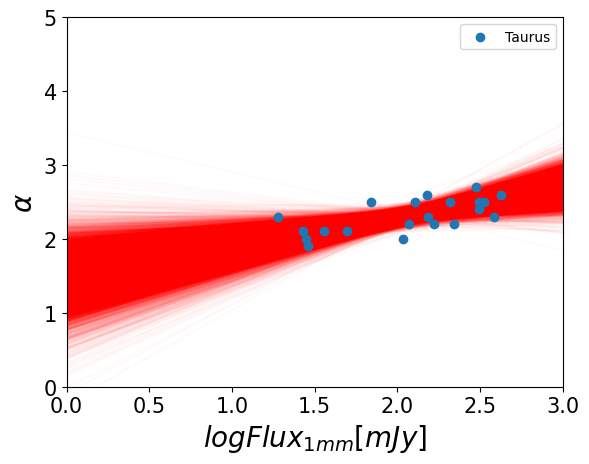

In [6]:
fig, ax = plt.subplots()

lm = linmix.LinMix(log_ricci_taurus_fluxes_1mm, spectral_indices_taurus, xsig[:len(ricci_taurus_fluxes_1mm)], ysig[:len(ricci_taurus_fluxes_1mm)], K=2)
lm.run_mcmc(silent=True)

taurus_slope_flux_alpha = []
taurus_y_intercept_flux_alpha = []
taurus_scatter =[]

xs = np.arange(xmin, xmax)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    taurus_slope_flux_alpha.append(lm.chain[i]['beta'])
    taurus_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    taurus_scatter.append(lm.chain[i]['sigsqr'])

plt.scatter(log_ricci_taurus_fluxes_1mm, spectral_indices_taurus, label='Taurus', zorder=1)

plt.xlabel('$log Flux_{1mm}[mJy]$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.legend()
plt.xlim(0,3)
plt.ylim(0,5)
ax.tick_params(which='both', labelsize=15)
plt.show()

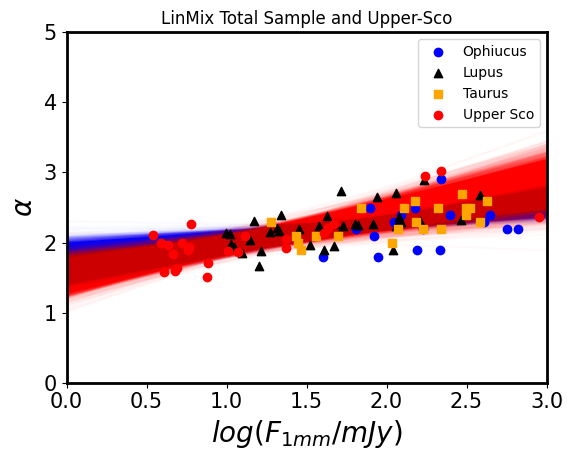

In [224]:
fig, ax = plt.subplots()

# set thickness axis
plt.setp(ax.spines.values(), linewidth=2)

# avoid axis labels being cut
plt.gcf().subplots_adjust(bottom=0.15, left=0.15)

log_total_fluxes = log_ricci_taurus_fluxes_1mm + log_flux_lupus_1_mm + log_flux_list_ophiucus_ricci_1mm
total_spectra_indices = spectral_indices_taurus + tazzari_lupus_spectral_indices + spectral_index_ophiucus

xsig = [0] * 100
ysig = [0] * 100
lm = linmix.LinMix(log_total_fluxes, total_spectra_indices, xsig[:len(log_total_fluxes)], ysig[:len(log_total_fluxes)], K=2)
lm.run_mcmc(silent=True)

total_sample_slope_flux_alpha = []
total_sample_y_intercept_flux_alpha = []
scatter_total_sample = []

xs = np.arange(0, 7)
for i in range(0, 10000):
    total_sample_slope_flux_alpha.append(lm.chain[i]['beta'])
    total_sample_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='b', alpha=0.02, zorder=0)
    scatter_total_sample.append(lm.chain[i]['sigsqr'])


lm = linmix.LinMix(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, xsig[:len(flux_barenfeld_0_88mm_updated)], ysig[:len(flux_barenfeld_0_88mm_updated)], K=2)
lm.run_mcmc(silent=True)

upper_sco_slope_flux_alpha = []
upper_sco_y_intercept_flux_alpha = []
scatter_upper_sco = []

xs = np.arange(0, 7)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    upper_sco_slope_flux_alpha.append(lm.chain[i]['beta'])
    upper_sco_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    scatter_upper_sco.append(lm.chain[i]['sigsqr'])

plt.scatter(log_flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, label='Ophiucus', color='blue', zorder=1)
plt.scatter(log_flux_lupus_1_mm, tazzari_lupus_spectral_indices, label='Lupus', marker='^', color='black', zorder=1)
plt.scatter(log_ricci_taurus_fluxes_1mm, spectral_indices_taurus, label='Taurus', marker='s', color='orange', zorder=1)
plt.scatter(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, label='Upper Sco', color='red', zorder=1)

plt.xlabel('$log(F_{1mm}/mJy)$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.xlim(0,3)
plt.ylim(0,5)
plt.legend()
ax.tick_params(which='both', labelsize=15)
plt.savefig("LinMix Total Sample and Upper-Sco")
plt.title("LinMix Total Sample and Upper-Sco")
plt.show()

# Histograms

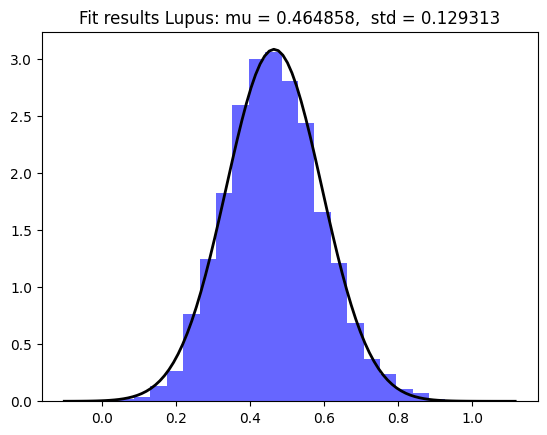

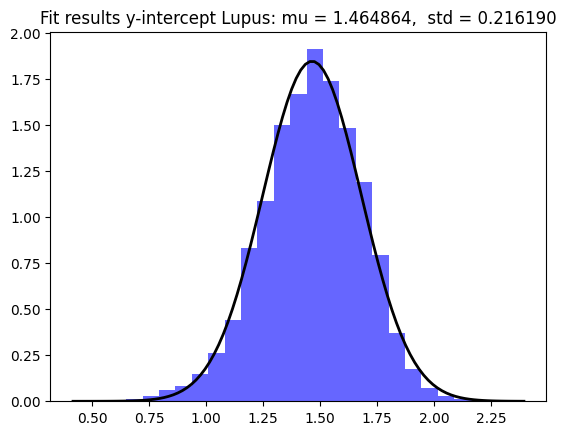

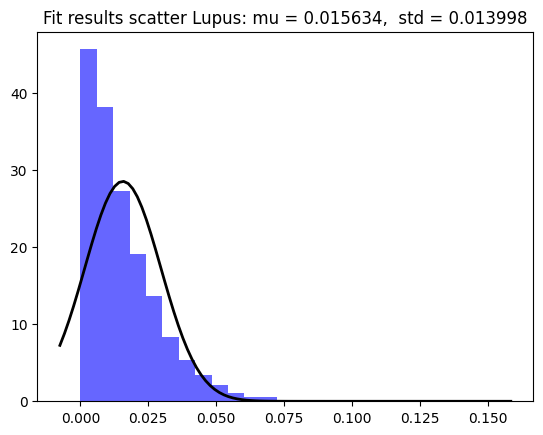

In [8]:
lupus_data.slope_mu, lupus_data.slope_std = norm.fit(lupus_slope_flux_alpha)
# Plot the histogram.
plt.hist(lupus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.slope_mu, lupus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results Lupus: mu = %.6f,  std = %.6f" % (lupus_data.slope_mu, lupus_data.slope_std)
plt.title(title)
plt.savefig("Fit Results Slope Lupus")
plt.show()

lupus_data.y_intercept_mu, lupus_data.y_intercept_std = norm.fit(lupus_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(lupus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.y_intercept_mu, lupus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Lupus: mu = %.6f,  std = %.6f" % (lupus_data.y_intercept_mu, lupus_data.y_intercept_std)
plt.title(title)
plt.savefig("Fit Results y-intercept Lupus")
plt.show()

lupus_scatter_mu, lupus_scatter_std = norm.fit(lupus_scatter)
# Plot the histogram.
plt.hist(lupus_scatter, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_scatter_mu, lupus_scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Lupus: mu = %.6f,  std = %.6f" % (lupus_scatter_mu, lupus_scatter_std)
plt.title(title)
plt.savefig("Fit Results Scatter Lupus")
plt.show()

### Ophiucus

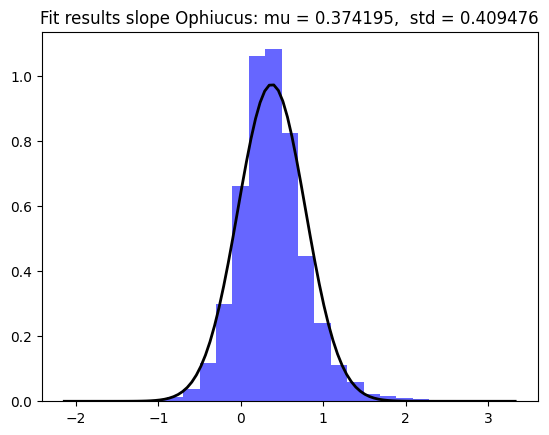

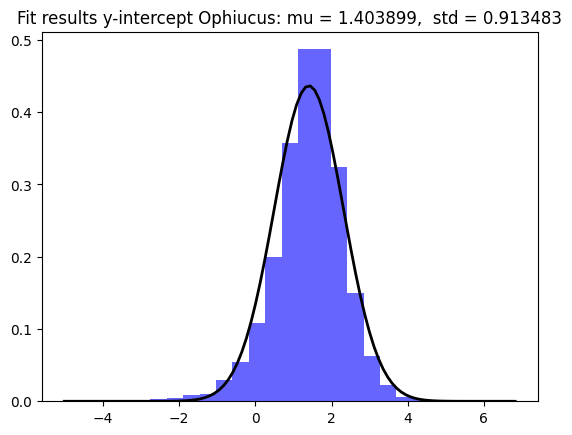

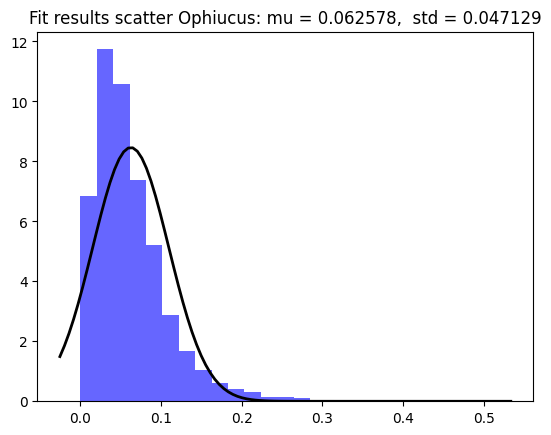

In [9]:
ophiucus_data.slope_mu, ophiucus_data.slope_std = norm.fit(ophiucus_slope_flux_alpha)
# Plot the histogram.
plt.hist(ophiucus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.slope_mu, ophiucus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results slope Ophiucus: mu = %.6f,  std = %.6f" % (ophiucus_data.slope_mu, ophiucus_data.slope_std)
plt.title(title)
plt.savefig("Fit Results slope Ophiucus")
plt.show()

ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std = norm.fit(ophiucus_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(ophiucus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Ophiucus: mu = %.6f,  std = %.6f" % (ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std)
plt.title(title)
plt.savefig("Fit Results y-intercept Ophiucus")
plt.show()

ophiucus_data.scatter_mu, ophiucus_data.scatter_std = norm.fit(ophiucus_scatter)
_std = norm.fit(ophiucus_scatter)
# Plot the histogram.
plt.hist(ophiucus_scatter, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.scatter_mu, ophiucus_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Ophiucus: mu = %.6f,  std = %.6f" % (ophiucus_data.scatter_mu, ophiucus_data.scatter_std)
plt.title(title)
plt.savefig("Fit Results scatter Ophiucus")
plt.show()

### Taurus

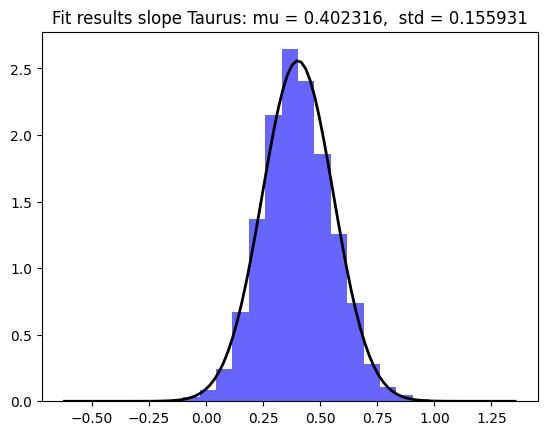

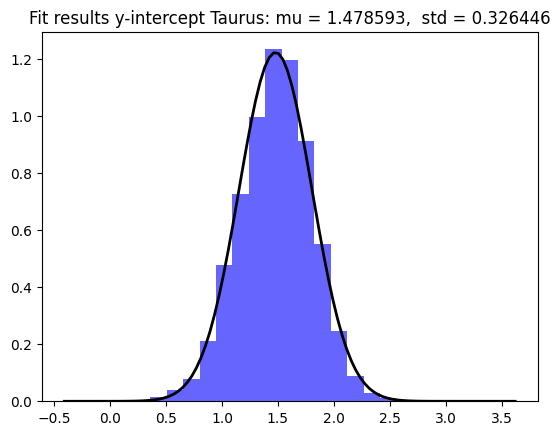

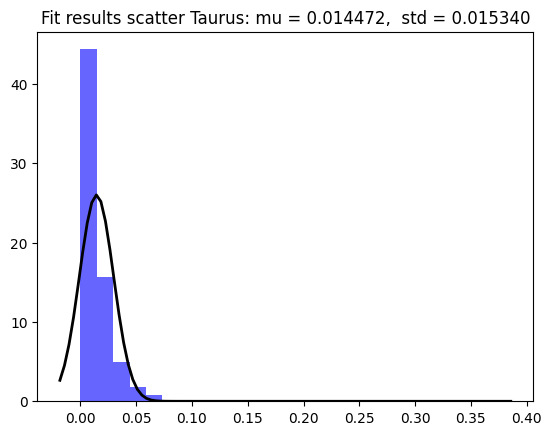

In [10]:
taurus_data.slope_mu, taurus_data.slope_std = norm.fit(taurus_slope_flux_alpha)
# Plot the histogram.
plt.hist(taurus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.slope_mu, taurus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results slope Taurus: mu = %.6f,  std = %.6f" % (taurus_data.slope_mu, taurus_data.slope_std)
plt.title(title)
plt.savefig("Fit Results slope Taurus")
plt.show()

taurus_data.y_intercept_mu, taurus_data.y_intercept_std = norm.fit(taurus_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(taurus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.y_intercept_mu, taurus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Taurus: mu = %.6f,  std = %.6f" % (taurus_data.y_intercept_mu, taurus_data.y_intercept_std)
plt.title(title)
plt.savefig("Fit Results y-intercept Taurus")
plt.show()

taurus_data.scatter_mu, taurus_data.scatter_std = norm.fit(taurus_scatter)
# Plot the histogram.
plt.hist(taurus_scatter, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.scatter_mu, taurus_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Taurus: mu = %.6f,  std = %.6f" % (taurus_data.scatter_mu, taurus_data.scatter_std)
plt.title(title)
plt.savefig("Fit Results scatter Taurus")
plt.show()

### Total Sample

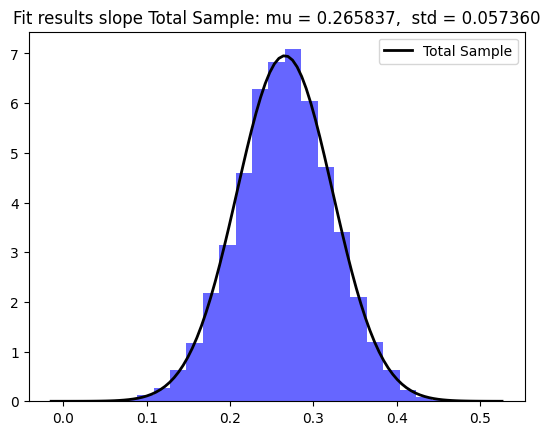

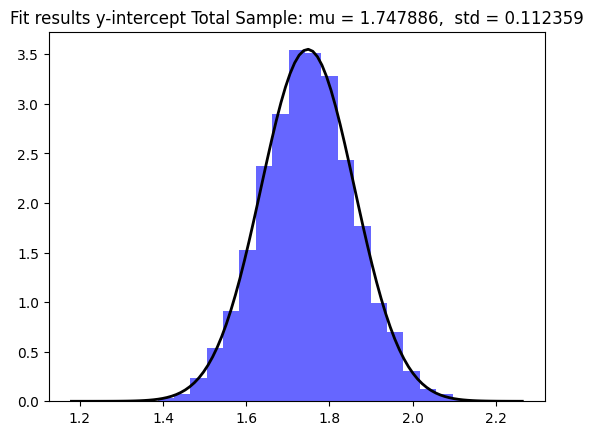

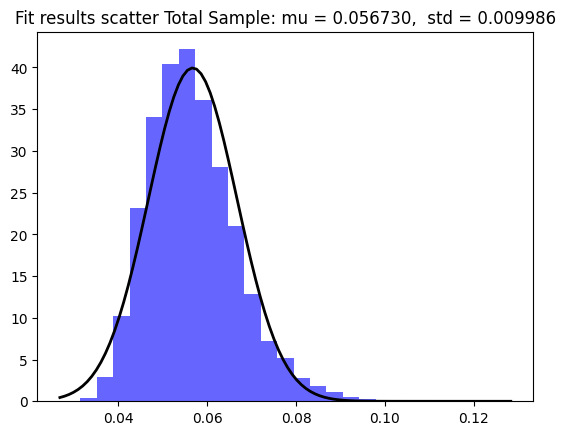

In [11]:
total_sample_data.slope_mu, total_sample_data.slope_std = norm.fit(total_sample_slope_flux_alpha)
# Plot the histogram.
plt.hist(total_sample_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.slope_mu, total_sample_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Total Sample")
title = "Fit results slope Total Sample: mu = %.6f,  std = %.6f" % (total_sample_data.slope_mu, total_sample_data.slope_std)
plt.title(title)
plt.legend()
plt.show()

total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std = norm.fit(total_sample_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(total_sample_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Total Sample: mu = %.6f,  std = %.6f" % (total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std)
plt.title(title)
plt.show()

total_sample_data.scatter_mu, total_sample_data.scatter_std = norm.fit(scatter_total_sample)
# Plot the histogram.
plt.hist(scatter_total_sample, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.scatter_mu, total_sample_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Total Sample: mu = %.6f,  std = %.6f" % (total_sample_data.scatter_mu, total_sample_data.scatter_std)
plt.title(title)
plt.show()

### Upper-Sco

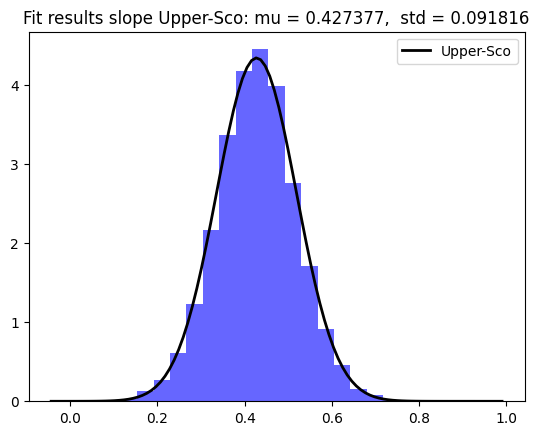

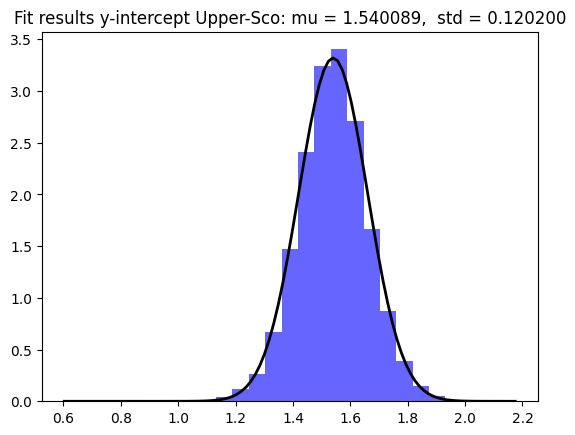

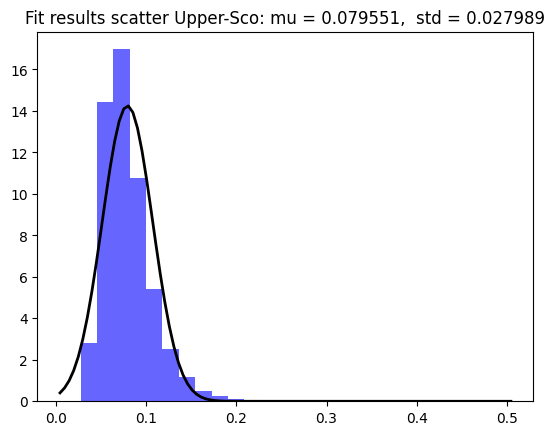

In [12]:
upper_sco_data.slope_mu, upper_sco_data.slope_std = norm.fit(upper_sco_slope_flux_alpha)
# Plot the histogram.
plt.hist(upper_sco_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.slope_mu, upper_sco_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Upper-Sco")
title = "Fit results slope Upper-Sco: mu = %.6f,  std = %.6f" % (upper_sco_data.slope_mu, upper_sco_data.slope_std)
plt.title(title)
plt.legend()
plt.show()

upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std = norm.fit(upper_sco_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(upper_sco_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Upper-Sco: mu = %.6f,  std = %.6f" % (upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std)
plt.title(title)
plt.show()

upper_sco_data.scatter_mu, upper_sco_data.scatter_std = norm.fit(scatter_upper_sco)
# Plot the histogram.
plt.hist(scatter_upper_sco, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.scatter_mu, upper_sco_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Upper-Sco: mu = %.6f,  std = %.6f" % (upper_sco_data.scatter_mu, upper_sco_data.scatter_std)
plt.title(title)
plt.show()

In [13]:
print(u"Lupus slope mean: %.5f \u00B1 %.5f "
      "\nOphiucus slope mean: %.5f \u00B1 %.5f"
      "\nTaurus slope mean: %.5f \u00B1 %.5f"
      "\nTotal Sample slope mean: %.5f \u00B1 %.5f"
      "\nUpper-Sco slope mean: %.5f \u00B1 %.5f"
      % (lupus_data.slope_mu, lupus_data.slope_std,
         ophiucus_data.slope_mu,ophiucus_data.slope_std,
         taurus_data.slope_mu, taurus_data.slope_std,
         total_sample_data.slope_mu, total_sample_data.slope_std,
         upper_sco_data.slope_mu, upper_sco_data.slope_std))

Lupus slope mean: 0.46486 ± 0.12931 
Ophiucus slope mean: 0.37419 ± 0.40948
Taurus slope mean: 0.40232 ± 0.15593
Total Sample slope mean: 0.26584 ± 0.05736
Upper-Sco slope mean: 0.42738 ± 0.09182


In [14]:
print(u"Lupus y-intercept mean: %.5f \u00B1 %.5f"
      "\nOphiucus y-intercept mean: %.5f \u00B1 %.5f"
      "\nTaurus y-intercept mean: %.5f\u00B1 %.5f"
      "\nTotal Sample y-intercept mean: %.5f \u00B1 %.5f"
      "\nUpper-Sco y-intercept mean: %.5f \u00B1 %.5f"
      % (lupus_data.y_intercept_mu, lupus_data.y_intercept_std,
         ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std,
         taurus_data.y_intercept_mu, taurus_data.y_intercept_std,
         total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std,
         upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std))

Lupus y-intercept mean: 1.46486 ± 0.21619
Ophiucus y-intercept mean: 1.40390 ± 0.91348
Taurus y-intercept mean: 1.47859± 0.32645
Total Sample y-intercept mean: 1.74789 ± 0.11236
Upper-Sco y-intercept mean: 1.54009 ± 0.12020


In [15]:
print(u"Lupus scatter mean: %.5f \u00B1 %.5f "
      "\nOphiucus scatter mean: %.5f \u00B1 %.5f"
      "\nTaurus scatter mean: %.5f \u00B1 %.5f"
      "\nTotal scatter slope mean: %.5f \u00B1 %.5f"
      "\nUpper-Sco scatter mean: %.5f \u00B1 %.5f"
      % (lupus_scatter_mu, lupus_scatter_std,
         ophiucus_data.scatter_mu, ophiucus_data.scatter_std,
         taurus_data.scatter_mu, taurus_data.scatter_std,
         total_sample_data.scatter_mu, total_sample_data.scatter_std,
         upper_sco_data.scatter_mu, upper_sco_data.scatter_std))

Lupus scatter mean: 0.01563 ± 0.01400 
Ophiucus scatter mean: 0.06258 ± 0.04713
Taurus scatter mean: 0.01447 ± 0.01534
Total scatter slope mean: 0.05673 ± 0.00999
Upper-Sco scatter mean: 0.07955 ± 0.02799


In [220]:
from tabulate import tabulate
first_row = ["Region", "Slope", "Y-Intercept ", "Scatter"]
table = [["Upper-Sco", str(round(upper_sco_data.slope_mu, 4)) + r'$\pm$' + str(round(upper_sco_data.slope_std, 4)), str(round(upper_sco_data.y_intercept_mu, 4)) + '$\pm$' + str(round(upper_sco_data.y_intercept_std, 4)), str(round(upper_sco_data.scatter_mu, 4)) + r'$\pm$' + str(round(upper_sco_data.scatter_std, 4))],
         ["Lupus", str(round(lupus_data.slope_mu, 4)) + '$\pm$' + str(round(lupus_data.slope_std, 4)), str(round(lupus_data.y_intercept_mu, 4)) + '$\pm$' + str(round(lupus_data.y_intercept_std, 4)), str(round(lupus_scatter_mu, 4)) + '$\pm$' + str(round(lupus_scatter_std, 4))],
         ["Taurus", str(round(taurus_data.slope_mu, 4)) + '$\pm$' + str(round(taurus_data.slope_std, 4)), str(round(taurus_data.y_intercept_mu, 4)) + '$\pm$' + str(round(taurus_data.y_intercept_std, 4)), str(round(taurus_data.scatter_mu, 4)) + '$\pm$' + str(round(taurus_data.scatter_std, 4))],
         ["Ophiucus", str(round(ophiucus_data.slope_mu, 4)) + '$\pm$' + str(round(ophiucus_data.slope_std, 4)), str(round(ophiucus_data.y_intercept_mu, 4)) + '$\pm$' + str(round(ophiucus_data.y_intercept_std, 4)), str(round(ophiucus_data.scatter_mu, 4)) + '$\pm$' + str(round(ophiucus_data.scatter_std, 4))],
         ["Lupus + Taurus + Ophiucus", str(round(total_sample_data.slope_mu, 4)) + '$\pm$' + str(round(total_sample_data.slope_std, 4)), str(round(total_sample_data.y_intercept_mu, 4)) + '$\pm$' + str(round(total_sample_data.y_intercept_std, 4)), str(round(total_sample_data.scatter_mu, 4)) + '$\pm$' + str(round(total_sample_data.scatter_std, 4))]]
print(tabulate(table, headers = first_row))
with open("Table_6.txt", "w") as f:
    f.write(tabulate(table, headers = first_row))

Region                     Slope              Y-Intercept        Scatter
-------------------------  -----------------  -----------------  -----------------
Upper-Sco                  0.4274$\pm$0.0918  1.5401$\pm$0.1202  0.0796$\pm$0.028
Lupus                      0.4649$\pm$0.1293  1.4649$\pm$0.2162  0.0156$\pm$0.014
Taurus                     0.4023$\pm$0.1559  1.4786$\pm$0.3264  0.0145$\pm$0.0153
Ophiucus                   0.3742$\pm$0.4095  1.4039$\pm$0.9135  0.0626$\pm$0.0471
Lupus + Taurus + Ophiucus  0.2658$\pm$0.0574  1.7479$\pm$0.1124  0.0567$\pm$0.01


/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_175/1930988756.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color="g", label="Lupus")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_175/1930988756.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_175/1930988756.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Ophiucus", color="r")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipyk

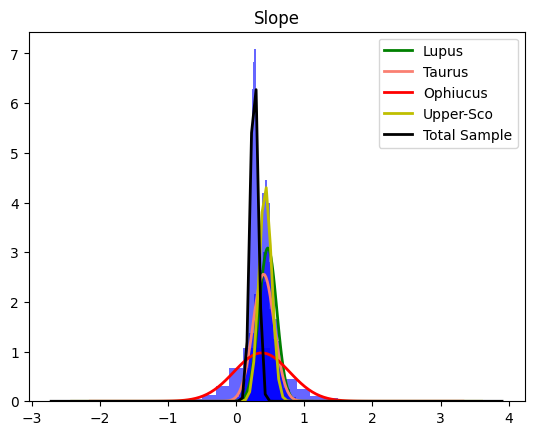

In [17]:
# Plot the histogram.
plt.hist(lupus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.slope_mu, lupus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, color="g", label="Lupus")


# Plot the histogram.
plt.hist(taurus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.slope_mu, taurus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")


# Plot the histogram.
plt.hist(ophiucus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.slope_mu, ophiucus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Ophiucus", color="r")


# Plot the histogram.
plt.hist(upper_sco_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.slope_mu, upper_sco_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Upper-Sco", color="y")


# Plot the histogram.
plt.hist(total_sample_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.slope_mu, total_sample_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Total Sample")


plt.title("Slope")
plt.legend()

/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_175/2835114649.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Lupus", color="g")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_175/2835114649.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_175/2835114649.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color="r")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_175/28351146

Text(0.5, 1.0, 'Y-Intercept')

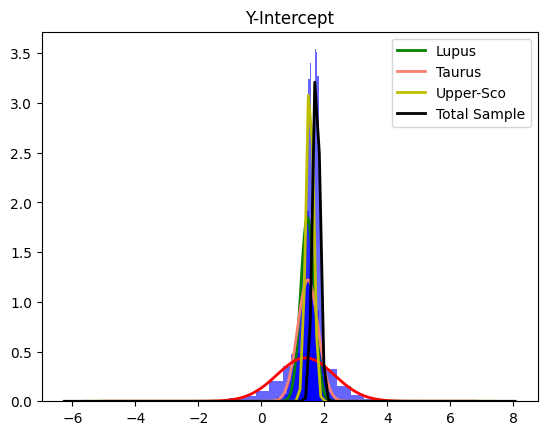

In [18]:
# Plot the histogram.
plt.hist(lupus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.y_intercept_mu, lupus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Lupus", color="g")


# Plot the histogram.
plt.hist(taurus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.y_intercept_mu, taurus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")


# Plot the histogram.
plt.hist(ophiucus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, color="r")


# Plot the histogram.
plt.hist(upper_sco_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Upper-Sco", color="y")


# Plot the histogram.
plt.hist(total_sample_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Total Sample")

plt.legend()
plt.title("Y-Intercept")

In [19]:
#ks test
# assume scatter = 0, calculate spectral_index for upper-sco from function of total sample
# repeat by changing alpha, beta and scatter
# using montecarlo simulation random values for alpha, beta and scatter will be taken
# note that while alpha and beta will be constant for each rune, scatter will not
# I have to randomly assign a spread for the scatter for every run
# for every element calculated in every run, scatter will have to change and be withing the standard deviation

# the run ks 2 sample test on observed vs calculated and store the values

## Take random values from Gaussian

In [20]:
calculated_spectra_indices_upper_sco = []
calculated_spectra_indices_lupus = []

def spectral_index_function(alpha, beta, scatter, x):
    return alpha + beta * x - scatter

beta_list = []
alpha_list = []
def loop_spectra_index(slope_mu, slope_std, y_intercept_mu, y_intercept_std, scatter_mu, scatter_std, flux):
    beta = random.gauss(slope_mu, slope_std)
    beta_list.append(beta)
    alpha = random.gauss(y_intercept_mu, y_intercept_std)
    alpha_list.append(alpha)
    subset = []
    for x in range(len(flux)):
        new_scatter_std = random.gauss(scatter_mu, scatter_std)
        scatter = random.gauss(scatter_mu, scatter_mu - new_scatter_std)
        subset.append(spectral_index_function(alpha, beta, scatter, flux[x]))

    return subset

for i in range(1000):
    calculated_spectra_indices_upper_sco.append(loop_spectra_index(upper_sco_data.slope_mu, upper_sco_data.slope_std,
                                                                   upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std,
    upper_sco_data.scatter_mu, upper_sco_data.scatter_std,
    log_flux_barenfeld_0_88mm_updated))

    calculated_spectra_indices_lupus.append(loop_spectra_index(lupus_data.slope_mu, lupus_data.slope_std, lupus_data.y_intercept_mu, lupus_data.y_intercept_std, lupus_scatter_mu, lupus_scatter_std, log_flux_lupus_1_mm))

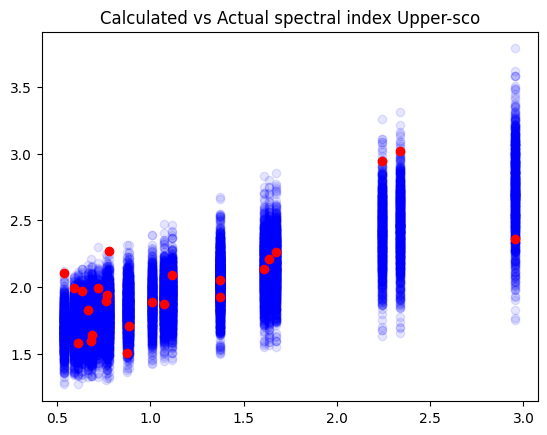

Mean ks test on calculated vs measure spectral index for upper-sco from upper-sco mc simulation:  0.26201074553336584


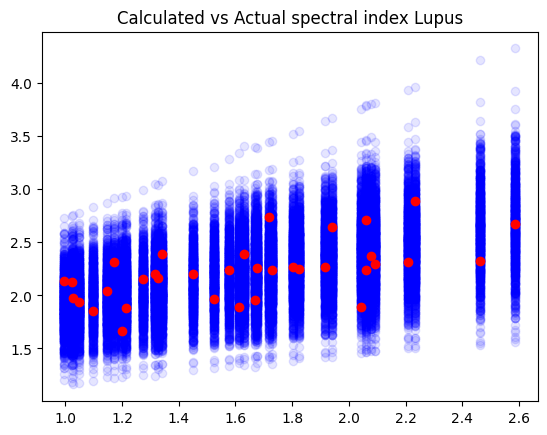

In [21]:
ks_2sample_upper_sco = []
for i in range(len(calculated_spectra_indices_upper_sco)):
    ks_2sample_upper_sco.append(ks_2samp(spectral_index_upper_sco, calculated_spectra_indices_upper_sco[i])[1])
    plt.scatter(log_flux_barenfeld_0_88mm_updated, calculated_spectra_indices_upper_sco[i], alpha=0.1, c="b")

plt.scatter(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, c='r')
plt.title("Calculated vs Actual spectral index Upper-sco")
plt.show()
print("Mean ks test on calculated vs measure spectral index for upper-sco from upper-sco mc simulation: ", np.mean(ks_2sample_upper_sco))


for i in range(len(calculated_spectra_indices_lupus)):
    plt.scatter(log_flux_lupus_1_mm, calculated_spectra_indices_lupus[i], alpha=0.1, c="b")

plt.scatter(log_flux_lupus_1_mm, tazzari_lupus_spectral_indices, c='r')
plt.title("Calculated vs Actual spectral index Lupus")
plt.show()

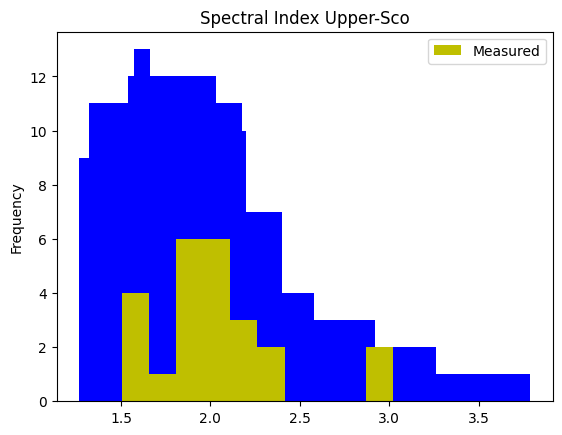

In [22]:
for i in range(len(calculated_spectra_indices_upper_sco)):
    mu_calculated, std_calculated = norm.fit(calculated_spectra_indices_upper_sco[i])

    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu_calculated, std_calculated)
    plt.hist(calculated_spectra_indices_upper_sco[i], color='b')

plt.hist(spectral_index_upper_sco, color='y', label='Measured')

plt.title("Spectral Index Upper-Sco")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Text(0, 0.5, '$\\alpha$')

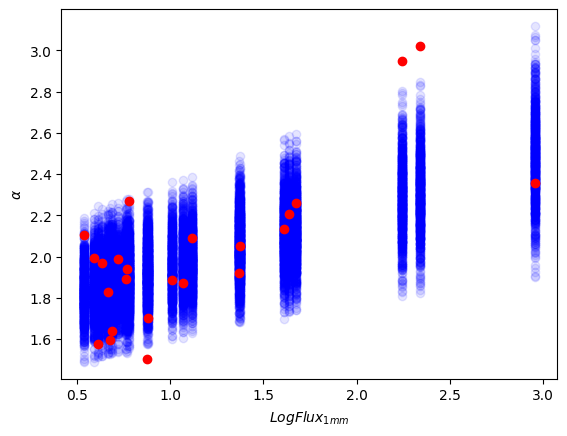

In [23]:
calculated_spectral_index_upper_sco_from_total_sample = []

for i in range(1000):
    calculated_spectral_index_upper_sco_from_total_sample.append(loop_spectra_index(total_sample_data.slope_mu, total_sample_data.slope_std, total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std,
    total_sample_data.scatter_mu, total_sample_data.scatter_std, log_flux_barenfeld_0_88mm_updated))

for i in range(len(calculated_spectral_index_upper_sco_from_total_sample)):
    plt.scatter(log_flux_barenfeld_0_88mm_updated, calculated_spectral_index_upper_sco_from_total_sample[i], alpha=0.1, c="b")

plt.scatter(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, c='r')
plt.xlabel("$Log Flux_{1mm}$")
plt.ylabel(r"$\alpha$")

#### Mean of ks_2sample between real upper-sco spectral indices and calculated upper-sco spectral index values from the Monte-Carlo simulation for total sample

In [24]:
matching_upper_sco_real_vs_from_total_sample = []
statistics_matching_upper_sco_real_vs_from_total_sample = []
for i in range(len(calculated_spectral_index_upper_sco_from_total_sample)):
    matching_upper_sco_real_vs_from_total_sample.append(ks_2samp(calculated_spectral_index_upper_sco_from_total_sample[i], spectral_index_upper_sco)[1])
    statistics_matching_upper_sco_real_vs_from_total_sample.append(ks_2samp(calculated_spectral_index_upper_sco_from_total_sample[i], spectral_index_upper_sco)[0])

print("Mean ks test on calculated vs measure spectral index for upper-sco from total sample mc simulation: ", np.mean(matching_upper_sco_real_vs_from_total_sample))

Mean ks test on calculated vs measure spectral index for upper-sco from total sample mc simulation:  0.20313481952439902


[17.0, 14.0, 7.0, 12.0, 6.0, 12.0, 14.0, 9.0, 12.0, 7.0, 11.0, 9.0, 12.0, 6.0, 6.0, 6.0, 6.0, 11.0, 16.0, 10.0, 5.0, 10.0, 15.0, 12.0, 14.0, 9.0, 15.0, 6.0, 11.0, 8.0, 5.0, 13.0, 8.0, 6.0, 11.0, 10.0, 5.0, 9.0, 10.0, 12.0, 10.0, 17.0, 11.0, 6.0, 6.0, 5.0, 5.0, 8.0, 5.0, 11.0, 14.0, 13.0, 7.0, 6.0, 10.0, 7.0, 9.0, 10.0, 6.0, 7.0, 14.0, 9.0, 6.0, 6.0, 5.0, 8.0, 9.0, 9.0, 7.0, 11.0, 6.0, 11.0, 7.0, 16.0, 10.0, 9.0, 5.0, 7.0, 7.0, 8.0, 9.0, 13.0, 7.0, 6.0, 7.0, 6.0, 12.0, 6.0, 7.0, 7.0, 5.0, 9.0, 9.0, 6.0, 6.0, 9.0, 10.0, 6.0, 6.0, 6.0, 13.0, 6.0, 13.0, 16.0, 8.0, 14.0, 15.0, 8.0, 11.0, 6.0, 7.0, 6.0, 7.0, 15.0, 10.0, 12.0, 7.0, 6.0, 9.0, 16.0, 10.0, 11.0, 8.0, 13.0, 5.0, 6.0, 8.0, 16.0, 6.0, 12.0, 6.0, 17.0, 10.0, 7.0, 8.0, 11.0, 6.0, 10.0, 6.0, 5.0, 11.0, 9.0, 7.0, 6.0, 7.0, 11.0, 7.0, 6.0, 8.0, 13.0, 14.0, 5.0, 7.0, 7.0, 6.0, 5.0, 8.0, 7.0, 6.0, 5.0, 12.0, 9.0, 8.0, 10.0, 9.0, 7.0, 6.0, 6.0, 12.0, 13.0, 7.0, 6.0, 15.0, 10.0, 6.0, 6.0, 6.0, 7.0, 10.0, 10.0, 8.0, 6.0, 6.0, 6.0, 9.0, 9.0, 

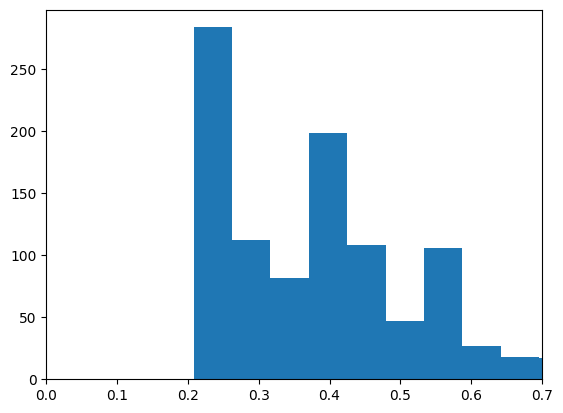

In [25]:
plt.hist(statistics_matching_upper_sco_real_vs_from_total_sample, bins=10)
plt.xlim(0,0.7)
statistics_matching_upper_sco_real_vs_from_total_sample = [x*24 for x in statistics_matching_upper_sco_real_vs_from_total_sample]
print(statistics_matching_upper_sco_real_vs_from_total_sample)
print(min(statistics_matching_upper_sco_real_vs_from_total_sample))

#### Mean of ks_2sample between real upper-sco spectral indices and calculated upper-sco spectral index values from the Monte-Carlo simulation for upper-sco sample

In [26]:
print(np.mean(ks_2sample_upper_sco))

0.26201074553336584


In [27]:
print(np.mean(matching_upper_sco_real_vs_from_total_sample)/np.mean(ks_2sample_upper_sco))

0.7752919412174671


In [28]:
print(max(matching_upper_sco_real_vs_from_total_sample))
print(min(matching_upper_sco_real_vs_from_total_sample))

0.686017125117228
7.610805516337407e-07


In [29]:
print(np.median(matching_upper_sco_real_vs_from_total_sample))
print(np.median(ks_2sample_upper_sco))

0.06780335175136987
0.13982257948893737


In [30]:
print(matching_upper_sco_real_vs_from_total_sample, '\n ________________________')

[4.566483309802445e-06, 0.0004056559340207839, 0.26283384201555077, 0.00432085032746239, 0.4490368220409109, 0.00432085032746239, 0.0004056559340207839, 0.06780335175136987, 0.00432085032746239, 0.26283384201555077, 0.011965431606262756, 0.06780335175136987, 0.00432085032746239, 0.4490368220409109, 0.4490368220409109, 0.4490368220409109, 0.4490368220409109, 0.011965431606262756, 2.340322696273753e-05, 0.029913567122680163, 0.686017125117228, 0.029913567122680163, 0.00010401434205661125, 0.00432085032746239, 0.0004056559340207839, 0.06780335175136987, 0.00010401434205661125, 0.4490368220409109, 0.011965431606262756, 0.13982257948893737, 0.686017125117228, 0.0014013568629808897, 0.13982257948893737, 0.4490368220409109, 0.011965431606262756, 0.029913567122680163, 0.686017125117228, 0.06780335175136987, 0.029913567122680163, 0.00432085032746239, 0.029913567122680163, 4.566483309802445e-06, 0.011965431606262756, 0.4490368220409109, 0.4490368220409109, 0.686017125117228, 0.686017125117228, 0

In [31]:
print(calculated_spectral_index_upper_sco_from_total_sample[0], '\n',
      calculated_spectral_index_upper_sco_from_total_sample[2], '\n',
      calculated_spectral_index_upper_sco_from_total_sample[4], '\n',
      spectral_index_upper_sco)

[2.178335554878058, 2.181710970149729, 2.574217815175023, 2.121387656920948, 2.1119635282239164, 2.168157192849978, 2.243519962343001, 2.141396108195938, 2.5930733631021847, 2.1947990600988443, 2.1363247749382936, 2.2756761027649652, 2.3421683223416028, 2.4202329519891346, 2.4225690668526885, 2.1596305535217577, 2.7804618966067074, 2.1763738717190195, 2.2059697155979636, 2.1483998986630835, 2.4047256795676253, 2.25879537748039, 2.342046869923377, 2.149915259062224] 
 [1.8634729472791791, 1.8443232789418864, 2.146847712970821, 1.8070163438838875, 1.7942601734102215, 1.8360874220002699, 1.8914095715368313, 1.8186710620144662, 2.1239096403843454, 1.8697309062866505, 1.8256037482800724, 1.899305106268767, 1.9450067172953904, 2.0064707559182273, 2.015681501999825, 1.8297135600696595, 2.2529597561440746, 1.8484453843998647, 1.8791905100163167, 1.8246620660787332, 1.9781310743699925, 1.9003168419443794, 1.9670803016572458, 1.81783942967335] 
 [1.9165750154129377, 1.9244274876506984, 2.4024081

In [32]:
print(alpha_list, '\n __________________________________ \n', beta_list)

[1.6777318116910824, 1.296342823638599, 1.663901084380539, 1.8702652871709908, 1.5490509037530331, 1.1297902678609806, 1.4985402469624196, 1.3908840419404398, 1.4456774343848624, 1.7590481441194201, 1.4667063635740967, 1.6794318198765124, 1.7151311935209839, 1.5458227184373596, 1.423829292327466, 1.637812145484895, 1.704342132312567, 1.5839299851611597, 1.4706590896329685, 1.563707473939929, 1.685533209161513, 1.7437897376672613, 1.6209007310790065, 1.815101184926965, 1.480536073935353, 1.5857430734192732, 1.3482490013826045, 1.3726651843279547, 1.4392195386244526, 1.4500587870342194, 1.405281163211262, 1.703151215044739, 1.5873244398629756, 1.3936684964240846, 1.526033259654509, 1.3403257641914503, 1.53667182393044, 1.4555337617798003, 1.4834890217825698, 1.3835579883293851, 1.497974863041043, 1.580391712436577, 1.3177828087534442, 1.1226435307631764, 1.4692446518512827, 1.7149040360950127, 1.4183919978286987, 1.2489975881135382, 1.4149551594613232, 2.0644302549271174, 1.4918965587331

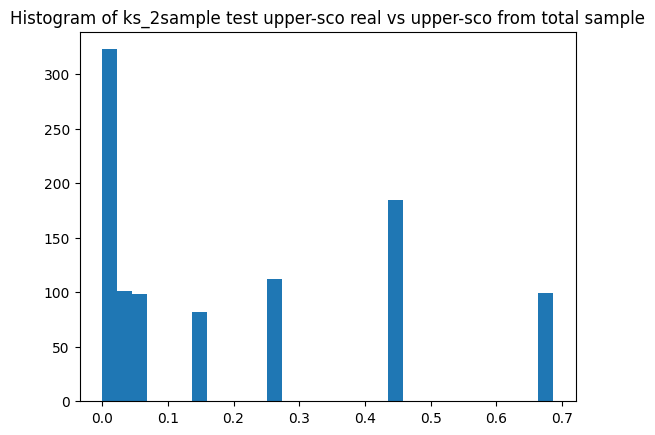

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.23416338, -0.13416338, -0.03416338,  0.06583662,  0.16583662,
         0.26583662,  0.36583662,  0.46583662,  0.56583662,  0.66583662,
         0.76583662]),
 <BarContainer object of 10 artists>)

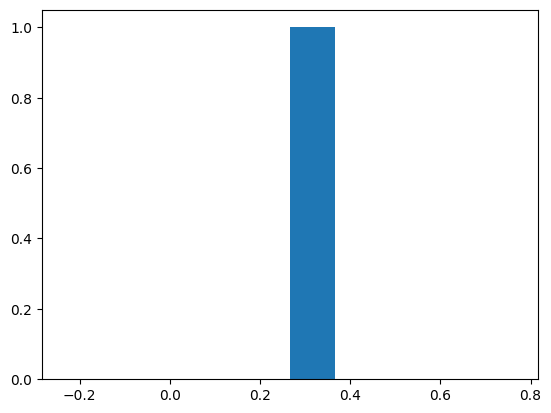

In [33]:
plt.hist(matching_upper_sco_real_vs_from_total_sample, bins=30)
plt.title('Histogram of ks_2sample test upper-sco real vs upper-sco from total sample')
plt.savefig('Histogram of ks_2sample test upper-sco real vs upper-sco from total sample')
plt.show()
plt.hist(total_sample_data.slope_mu)

In [34]:
less_than_2_5_spectral_index_upper_sco = []
less_than_2_5_flux_upper_sco = []
for i in spectral_index_upper_sco:
    if i <= 2.5:
        less_than_2_5_spectral_index_upper_sco.append(i)
        less_than_2_5_flux_upper_sco.append(log_flux_barenfeld_0_88mm_updated[spectral_index_upper_sco.index(i)])

In [35]:
less_than_2_5_index_upper_sco = region_data()

In [36]:
lm = linmix.LinMix(less_than_2_5_flux_upper_sco, less_than_2_5_spectral_index_upper_sco, xsig[:len(less_than_2_5_flux_upper_sco)], ysig[:len(less_than_2_5_flux_upper_sco)], K=2)
lm.run_mcmc(silent=True)

less_than_2_5_index_upper_sco = region_data()

xmin = 0
xmax = 800
xs = np.arange(xmin,xmax)
less_than_2_5_index_upper_sco.slope = []
less_than_2_5_index_upper_sco.y_intercept = []
less_than_2_5_index_upper_sco.scatter = []
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    less_than_2_5_index_upper_sco.slope.append(lm.chain[i]['beta'])
    less_than_2_5_index_upper_sco.y_intercept.append(lm.chain[i]['alpha'])
    less_than_2_5_index_upper_sco.scatter.append(lm.chain[i]['sigsqr'])

In [37]:
less_than_2_5_index_calculated_spectra_indices_upper_sco = []
less_than_2_5_index_upper_sco.slope_mu, less_than_2_5_index_upper_sco.slope_std = norm.fit(less_than_2_5_index_upper_sco.slope)
less_than_2_5_index_upper_sco.y_intercept_mu, less_than_2_5_index_upper_sco.y_intercept_std = norm.fit(less_than_2_5_index_upper_sco.y_intercept)
less_than_2_5_index_upper_sco.scatter_mu, less_than_2_5_index_upper_sco.scatter_std = norm.fit(less_than_2_5_index_upper_sco.scatter)

In [38]:
for i in range(1000):
    less_than_2_5_index_calculated_spectra_indices_upper_sco.append(loop_spectra_index(less_than_2_5_index_upper_sco.slope_mu, less_than_2_5_index_upper_sco.slope_std,
                                                                   less_than_2_5_index_upper_sco.y_intercept_mu, less_than_2_5_index_upper_sco.y_intercept_std,
    less_than_2_5_index_upper_sco.scatter_mu, less_than_2_5_index_upper_sco.scatter_std,
    less_than_2_5_flux_upper_sco))

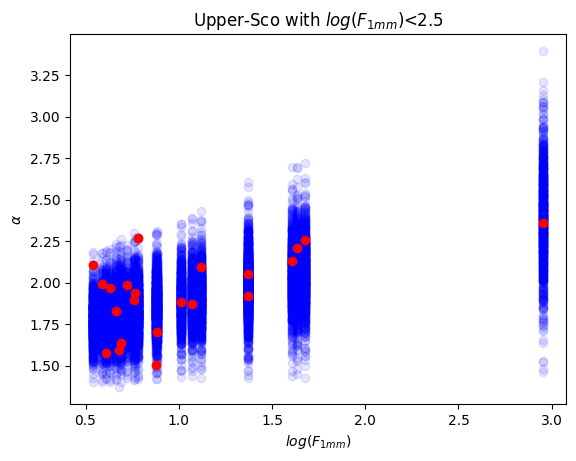

In [39]:
ks_2sample_less_than_2_5_upper_sco = []
for i in range(len(calculated_spectra_indices_upper_sco)):
    ks_2sample_less_than_2_5_upper_sco.append(ks_2samp(less_than_2_5_spectral_index_upper_sco, less_than_2_5_index_calculated_spectra_indices_upper_sco[i])[0])
    plt.scatter(less_than_2_5_flux_upper_sco, less_than_2_5_index_calculated_spectra_indices_upper_sco[i], alpha=0.1, c="b")

plt.title(r"Upper-Sco with $log(F_{1mm})$<2.5")
plt.ylabel(r'$\alpha$'), plt.xlabel('$log(F_{1mm})$')
plt.scatter(less_than_2_5_flux_upper_sco, less_than_2_5_spectral_index_upper_sco, color='r')

In [40]:
np.mean(ks_2sample_less_than_2_5_upper_sco)

0.4317272727272727

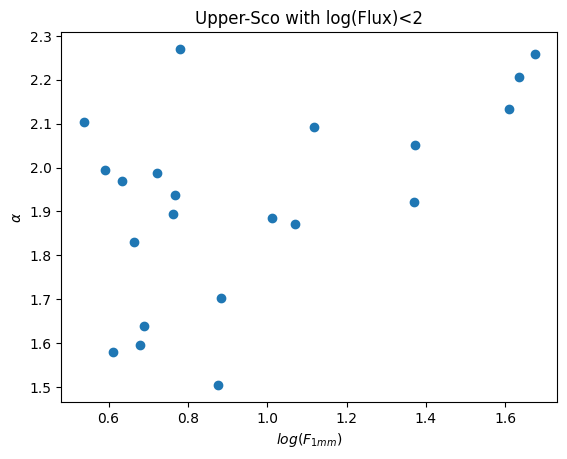

In [41]:
less_than_2_flux_upper_sco = region_data()
less_than_2_flux_upper_sco.index = []
less_than_2_flux_upper_sco.flux = []

for i in log_flux_barenfeld_0_88mm_updated:
    if i < 2.0:
        less_than_2_flux_upper_sco.flux.append(i)
        less_than_2_flux_upper_sco.index.append(spectral_index_upper_sco[log_flux_barenfeld_0_88mm_updated.index(i)])

plt.title("Upper-Sco with log(Flux)<2")
plt.ylabel(r'$\alpha$'), plt.xlabel('$log(F_{1mm})$')
plt.scatter(less_than_2_flux_upper_sco.flux, less_than_2_flux_upper_sco.index)


In [42]:
lm = linmix.LinMix(less_than_2_flux_upper_sco.flux, less_than_2_flux_upper_sco.index, xsig[:len(less_than_2_flux_upper_sco.flux)], ysig[:len(less_than_2_flux_upper_sco.flux)], K=2)
lm.run_mcmc(silent=True)

xmin = 0
xmax = 800
xs = np.arange(xmin,xmax)
less_than_2_flux_upper_sco.slope = []
less_than_2_flux_upper_sco.y_intercept = []
less_than_2_flux_upper_sco.scatter = []
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    less_than_2_flux_upper_sco.slope.append(lm.chain[i]['beta'])
    less_than_2_flux_upper_sco.y_intercept.append(lm.chain[i]['alpha'])
    less_than_2_flux_upper_sco.scatter.append(lm.chain[i]['sigsqr'])

In [43]:
less_than_2_flux_calculated_spectra_indices_upper_sco = []
less_than_2_flux_upper_sco.slope_mu, less_than_2_flux_upper_sco.slope_std = norm.fit(less_than_2_flux_upper_sco.slope)
less_than_2_flux_upper_sco.y_intercept_mu, less_than_2_flux_upper_sco.y_intercept_std = norm.fit(less_than_2_flux_upper_sco.y_intercept)
less_than_2_flux_upper_sco.scatter_mu, less_than_2_flux_upper_sco.scatter_std = norm.fit(less_than_2_flux_upper_sco.scatter)

In [44]:
for i in range(1000):
    less_than_2_flux_calculated_spectra_indices_upper_sco.append(loop_spectra_index(less_than_2_flux_upper_sco.slope_mu, less_than_2_flux_upper_sco.slope_std,
                                                                   less_than_2_flux_upper_sco.y_intercept_mu, less_than_2_flux_upper_sco.y_intercept_std,
    less_than_2_flux_upper_sco.scatter_mu, less_than_2_flux_upper_sco.scatter_std,
    less_than_2_flux_upper_sco.flux))

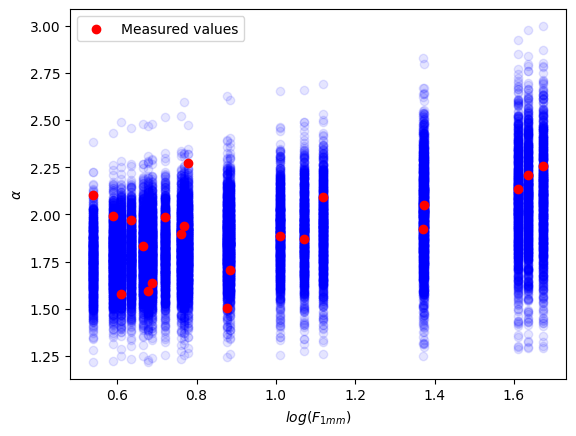

In [45]:
ks_2sample_less_than_2_flux_upper_sco = []
for i in range(len(calculated_spectra_indices_upper_sco)):
    ks_2sample_less_than_2_flux_upper_sco.append(ks_2samp(less_than_2_flux_upper_sco.index, less_than_2_flux_calculated_spectra_indices_upper_sco[i])[0])
    plt.scatter(less_than_2_flux_upper_sco.flux, less_than_2_flux_calculated_spectra_indices_upper_sco[i], alpha=0.1, c="b")


plt.ylabel(r'$\alpha$'), plt.xlabel('$log(F_{1mm})$')
plt.scatter(less_than_2_flux_upper_sco.flux, less_than_2_flux_upper_sco.index, color='r', label='Measured values')
plt.legend()
plt.show()


In [46]:
print(np.mean(ks_2sample_less_than_2_flux_upper_sco))

0.49680952380952387


Create set of total-sample values from upper-sco measured values

In [47]:
alpha_total_sample_from_upper_sco = []
for i in range(1000):
    alpha_total_sample_from_upper_sco.append(loop_spectra_index(upper_sco_data.slope_mu, upper_sco_data.slope_std,
                                                                   upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std,
    upper_sco_data.scatter_mu, upper_sco_data.scatter_std,
    log_total_fluxes))

KstestResult(statistic=0.4383561643835616, pvalue=1.104723237514226e-06)
KstestResult(statistic=0.3972602739726027, pvalue=1.563662172337789e-05)
KstestResult(statistic=0.3150684931506849, pvalue=0.0013250185395028724)
KstestResult(statistic=0.3835616438356164, pvalue=3.544300923965654e-05)
KstestResult(statistic=0.4383561643835616, pvalue=1.104723237514226e-06)
KstestResult(statistic=0.3698630136986301, pvalue=7.782052028707187e-05)
KstestResult(statistic=0.3972602739726027, pvalue=1.563662172337789e-05)
KstestResult(statistic=0.3561643835616438, pvalue=0.0001655755750788724)
KstestResult(statistic=0.3287671232876712, pvalue=0.0006829992471971829)
KstestResult(statistic=0.3972602739726027, pvalue=1.563662172337789e-05)
KstestResult(statistic=0.5205479452054794, pvalue=2.1937857217868223e-09)
KstestResult(statistic=0.5205479452054794, pvalue=2.1937857217868223e-09)
KstestResult(statistic=0.5068493150684932, pvalue=6.764172642176034e-09)
KstestResult(statistic=0.4931506849315068, pvalue

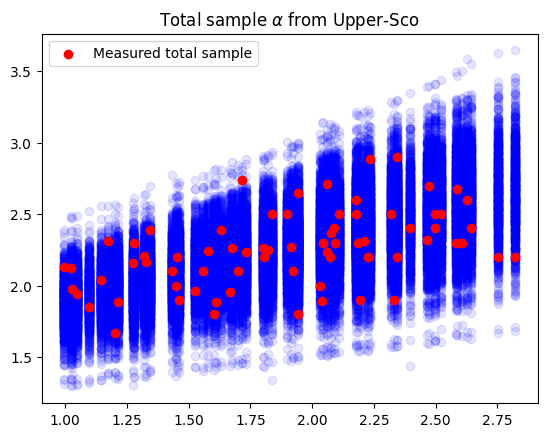

In [48]:
p_valueks_2sample_total_sample_from_upper_sco, ks_2sample_total_sample_from_upper_sco = [], []
for i in range(len(alpha_total_sample_from_upper_sco)):
    print(ks_2samp(alpha_total_sample_from_upper_sco[i], log_total_fluxes))
    ks_2sample_total_sample_from_upper_sco.append(ks_2samp(alpha_total_sample_from_upper_sco[i], log_total_fluxes)[0])
    p_valueks_2sample_total_sample_from_upper_sco.append(ks_2samp(alpha_total_sample_from_upper_sco[i], log_total_fluxes)[1])
    plt.scatter(log_total_fluxes, alpha_total_sample_from_upper_sco[i], alpha=0.1, c="b")

plt.title(r'Total sample $\alpha$ from Upper-Sco')
plt.scatter(log_total_fluxes, total_spectra_indices, c='r', label='Measured total sample')
plt.legend()


0.4820684931506849
0.0001009101495065475
0.4657534246575342


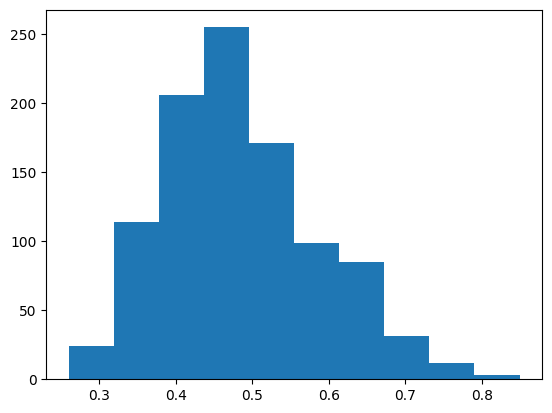

In [49]:
print(np.mean(ks_2sample_total_sample_from_upper_sco))
print(np.mean(p_valueks_2sample_total_sample_from_upper_sco))
plt.hist(ks_2sample_total_sample_from_upper_sco)
print(np.median(ks_2sample_total_sample_from_upper_sco))

In [50]:
calculated_alpha_total_sample_from_itself = []
for i in range(1000):
    calculated_alpha_total_sample_from_itself.append(loop_spectra_index(total_sample_data.slope_mu, total_sample_data.slope_std,
    total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std,
    total_sample_data.scatter_mu, total_sample_data.scatter_std,
    log_total_fluxes))

In [51]:
ks_2sample_calculated_total_sample_vs_measured = []
for i in range(1000):
    ks_2sample_calculated_total_sample_vs_measured.append(ks_2samp(calculated_alpha_total_sample_from_itself[i], total_spectra_indices)[1])

print(np.mean(ks_2sample_calculated_total_sample_vs_measured))

0.025395116899758145


In [52]:
print(np.mean(ks_2sample_total_sample_from_upper_sco)/np.mean(ks_2sample_calculated_total_sample_vs_measured))

18.982723924979293


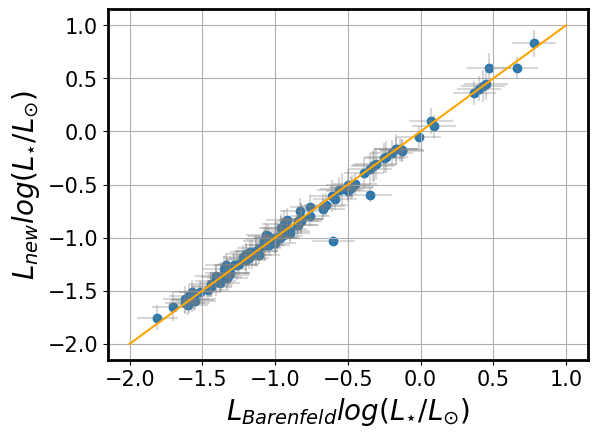

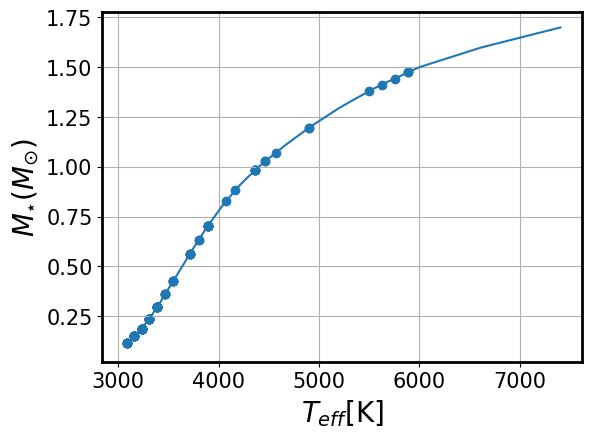

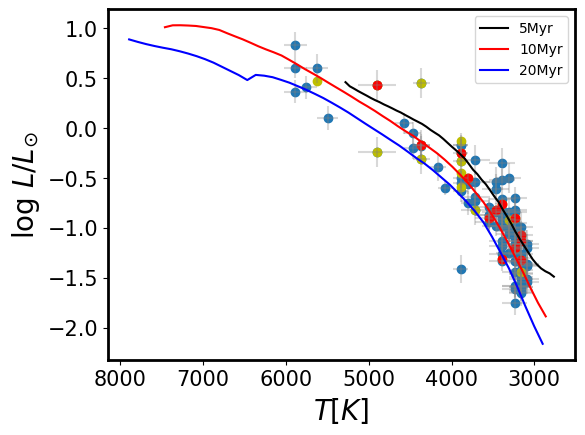

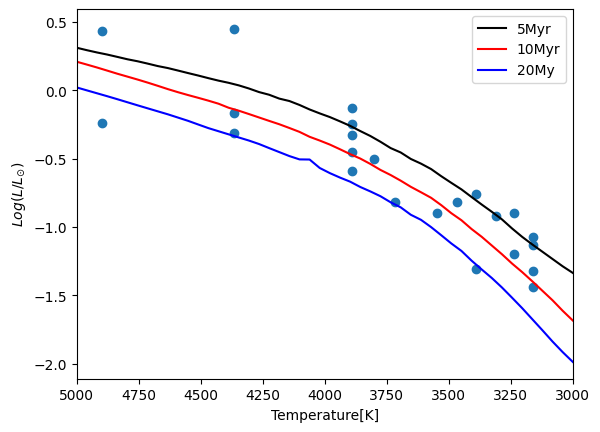

2.9487265841389996
2.3588885995561832
[1.8936752820133718, 1.9377739384931159, 2.9487265841389996, 1.9940617100648128, 2.104050274672768, 1.9885492826828755, 1.8853598363992103, 1.9690550822807236, 3.0214011127175606, 1.7036207539275081, 1.5785637388821967, 2.0921840951781787, 1.921694555107232, 2.2069906525876055, 2.258817833631177, 1.6389505318526834, 2.3588885995561832, 2.270253256160274, 1.5045161375846796, 1.595909812777543, 2.1330568846894087, 1.8706350322465939, 2.0501658967189953, 1.8300675071604586]
[-1.2, -1.31, 0.47, -1.13, -0.9, -0.82, -1.44, -0.17, -0.24, -0.9, -0.25, -0.92, -0.82, -0.59, -0.45, -0.76, 0.45, -0.5, -1.07, 0.43, -0.33, -0.13, -0.31, -1.32]
-0.24 4897.7881936844615


In [53]:
from data_file import temperature_list_barenfeld_updated, luminosity_list_barenfeld_updated
from HR_Diagram import f5, f10, f20
from Cumulative_spectral_indices import spectral_index_upper_sco
temperature_list_barenfeld_updated = [10 ** x for x in temperature_list_barenfeld_updated]
xmax, xmin = max(temperature_list_barenfeld_updated), min(temperature_list_barenfeld_updated)

#plot line 10Myr
x = np.linspace(np.min(3000), np.max(5000))
plt.plot(x, f5(x), c='k', label='5Myr')
plt.plot(x, f10(x), c='red', label='10Myr')
plt.plot(x, f20(x), c='b', label='20My')

plt.scatter(temperature_list_barenfeld_updated, luminosity_list_barenfeld_updated)
plt.xlim(5000, 3000)
plt.ylabel('$Log(L/L_{\odot})$'), plt.xlabel('Temperature[K]')
plt.legend()
plt.show()
print(spectral_index_upper_sco[luminosity_list_barenfeld_updated.index(max(luminosity_list_barenfeld_updated))])
print(spectral_index_upper_sco[luminosity_list_barenfeld_updated.index(0.45)])
print(spectral_index_upper_sco)
print(luminosity_list_barenfeld_updated)
print(luminosity_list_barenfeld_updated[spectral_index_upper_sco.index(3.0214011127175606)], temperature_list_barenfeld_updated[spectral_index_upper_sco.index(3.0214011127175606)])

(Text(0.5, 0, 'Temperature[K]'), Text(0, 0.5, '$\\alpha$'))

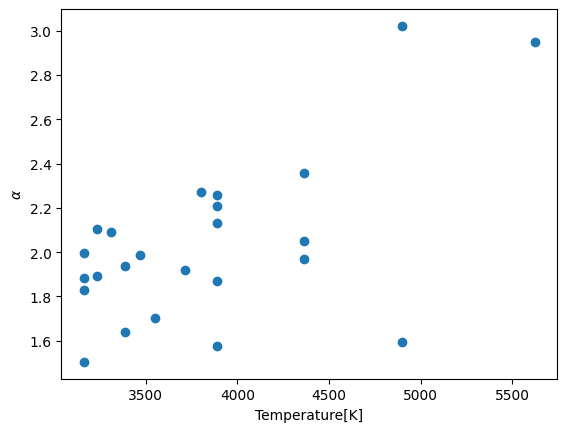

In [54]:
plt.scatter(temperature_list_barenfeld_updated, spectral_index_upper_sco)
plt.xlabel("Temperature[K]"), plt.ylabel(r"$\alpha$")

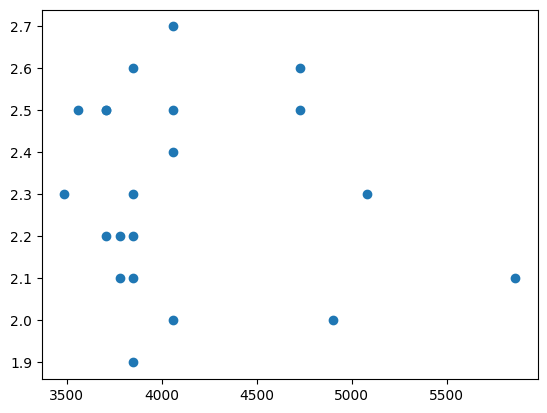

In [55]:
from data_file import ricci_temperature_taurus_1mm
plt.scatter(ricci_temperature_taurus_1mm, spectral_indices_taurus)

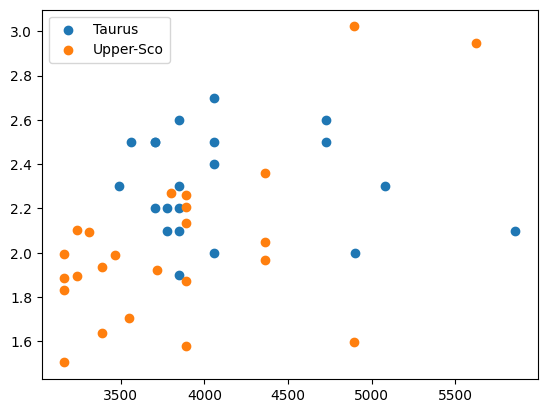

In [56]:
plt.scatter(ricci_temperature_taurus_1mm, spectral_indices_taurus, label='Taurus')
plt.scatter(temperature_list_barenfeld_updated, spectral_index_upper_sco, label="Upper-Sco")
plt.legend()

In [57]:
print(len(spectral_index_upper_sco), len(spectral_indices_taurus), len(spectral_index_ophiucus), len(spectral_index_ophiucus))

24 21 17 17


In [58]:
print(ks_2samp(spectral_index_upper_sco, spectral_indices_taurus))

KstestResult(statistic=0.5357142857142857, pvalue=0.0017269211993544886)


In [63]:
from scipy.stats import anderson
print(anderson(spectral_index_upper_sco, dist='norm'))

AndersonResult(statistic=0.8345784281164939, critical_values=array([0.513, 0.584, 0.701, 0.817, 0.972]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [84]:
all_spectral_indices = spectral_indices_taurus + spectral_index_upper_sco + spectral_index_ophiucus + tazzari_lupus_spectral_indices
print(anderson(all_spectral_indices, dist='norm'))

KeyboardInterrupt: 

In [82]:
from scipy.stats import shapiro
print(shapiro(all_spectral_indices))

ShapiroResult(statistic=0.9843900799751282, pvalue=0.30653923749923706)


In [83]:
from scipy.stats import anderson_ksamp
print(anderson_ksamp([spectral_index_upper_sco, spectral_indices_taurus, spectral_index_ophiucus, tazzari_lupus_spectral_indices]))

Anderson_ksampResult(statistic=4.501273446132445, critical_values=array([0.49854918, 1.3236709 , 1.91577682, 2.49304213, 3.24593219,
       3.82285604, 5.12078789]), significance_level=0.0021665648773763146)


ShapiroResult(statistic=0.9999815225601196, pvalue=0.9454414248466492)


(array([[  0.,   4.,  35., 165., 310., 294., 160.,  29.,   3.,   0.],
        [  0.,   1.,  28., 157., 316., 322., 144.,  26.,   5.,   1.],
        [  0.,   8.,  29., 146., 334., 299., 159.,  23.,   2.,   0.],
        [  0.,   3.,  38., 159., 321., 297., 150.,  32.,   0.,   0.],
        [  1.,   2.,  37., 133., 322., 309., 157.,  34.,   5.,   0.],
        [  0.,   2.,  35., 152., 312., 305., 156.,  34.,   4.,   0.],
        [  0.,   2.,  32., 156., 302., 325., 153.,  27.,   3.,   0.],
        [  0.,   8.,  42., 145., 316., 299., 149.,  37.,   4.,   0.],
        [  0.,   2.,  46., 144., 296., 316., 155.,  38.,   3.,   0.],
        [  0.,   3.,  25., 152., 323., 308., 143.,  40.,   5.,   1.],
        [  0.,   3.,  38., 151., 333., 309., 127.,  34.,   5.,   0.],
        [  1.,   5.,  24., 143., 322., 310., 157.,  33.,   5.,   0.],
        [  0.,   3.,  23., 165., 307., 318., 157.,  25.,   2.,   0.],
        [  0.,   3.,  26., 152., 299., 319., 163.,  35.,   3.,   0.],
        [  1.,   4.,

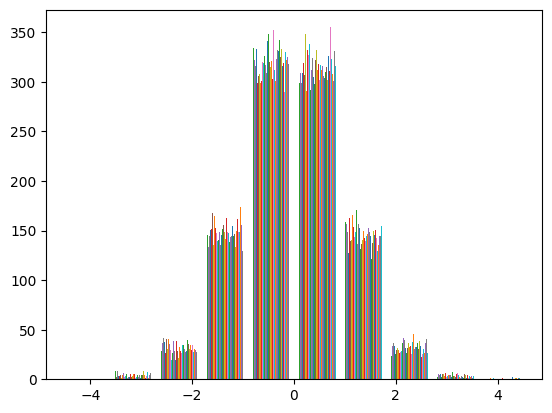

In [116]:
test_list = []
for i in range(100):
    test_list.append(np.random.normal(0, 1, 1000))
print(shapiro(test_list))
plt.hist(test_list)

KeyboardInterrupt: 

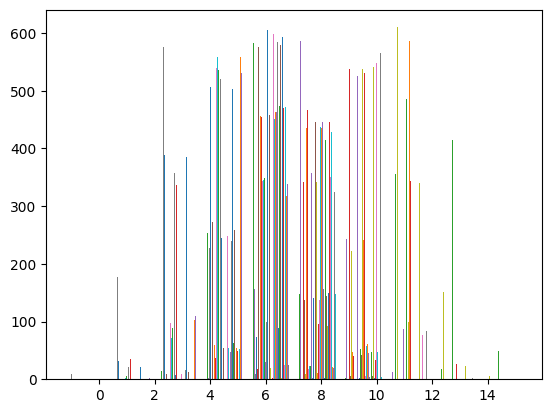

In [ ]:
test_list = [x+(random.randint(0,2)) for x in test_list]
print(len(test_list))
print(shapiro(test_list))
plt.hist(test_list)
choice = random.choice(test_list)
print(choice)
#print(test_list.index(choice))

In [118]:
print(spectral_index_upper_sco)

[1.8936752820133718, 1.9377739384931159, 2.9487265841389996, 1.9940617100648128, 2.104050274672768, 1.9885492826828755, 1.8853598363992103, 1.9690550822807236, 3.0214011127175606, 1.7036207539275081, 1.5785637388821967, 2.0921840951781787, 1.921694555107232, 2.2069906525876055, 2.258817833631177, 1.6389505318526834, 2.3588885995561832, 2.270253256160274, 1.5045161375846796, 1.595909812777543, 2.1330568846894087, 1.8706350322465939, 2.0501658967189953, 1.8300675071604586]


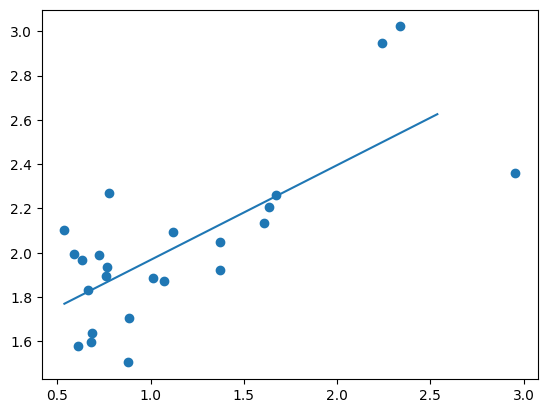

0.4278533267216873
0.4278533267216873


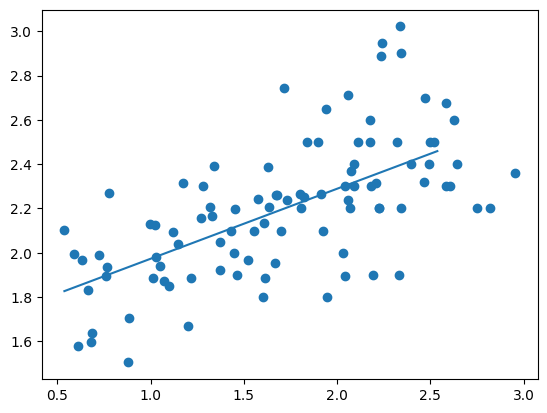

In [182]:
from scipy.stats import linregress

log_all_fluxes = log_ricci_taurus_fluxes_1mm + log_flux_barenfeld_0_88mm_updated + log_flux_list_ophiucus_ricci_1mm + log_flux_lupus_1_mm
all_spectral_indices = spectral_indices_taurus + spectral_index_upper_sco + spectral_index_ophiucus + tazzari_lupus_spectral_indices

slope, intercept, r, p, std_err = linregress(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco)

def myfunc(x):
  return slope * x + intercept

mymodel_upper_sco = list(map(myfunc, x))

plt.scatter(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco)
plt.plot(x, mymodel_upper_sco)
plt.show()
print(slope)
plt.show()

slope_all, intercept_all, r_all, p_all, std_err_all = linregress(log_all_fluxes, all_spectral_indices)

def myfunc(x):
  return slope_all * x + intercept_all

mymodel_all = list(map(myfunc, x))
plt.scatter(log_all_fluxes, all_spectral_indices)
plt.plot(x, mymodel_all)
print(slope)

In [183]:
import numpy as np

def rotate(points, theta):
    """Rotate a set of 2D points by an angle `theta`."""
    # Convert theta to radians
    theta = np.radians(theta)

    # Create the rotation matrix
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([[c, -s], [s, c]])

    # Apply the rotation matrix to the points
    rotated_points = np.dot(R, points.T).T

    return rotated_points

import math
theta_upper_sco = math.degrees(math.atan(slope))
rotated_points_upper_sco = rotate(np.array([log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco]).T, -theta_upper_sco)

Text(0.5, 1.0, 'Upper-Sco original and rotated')

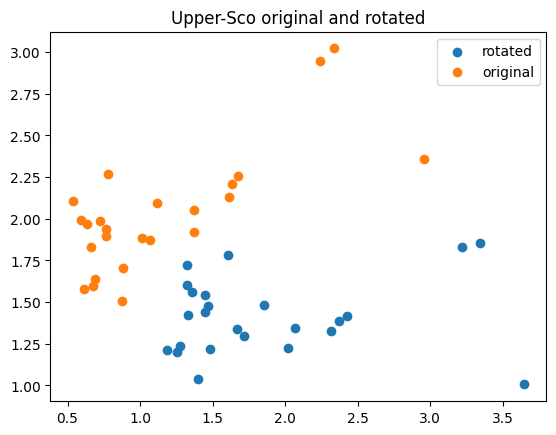

In [184]:
plt.scatter(rotated_points_upper_sco[:,0], rotated_points_upper_sco[:,1], label='rotated')
plt.scatter(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, label='original')
plt.legend()
plt.title('Upper-Sco original and rotated')

In [185]:
print(shapiro(rotated_points_upper_sco[:,1]))
print(shapiro(spectral_index_upper_sco))

ShapiroResult(statistic=0.9656581878662109, pvalue=0.5619866847991943)
ShapiroResult(statistic=0.887157142162323, pvalue=0.011615457013249397)


ShapiroResult(statistic=0.9843845367431641, pvalue=0.3062634766101837)
ShapiroResult(statistic=0.9843900799751282, pvalue=0.30653923749923706)
Anderson test rotated:  AndersonResult(statistic=0.3595300065618261, critical_values=array([0.555, 0.632, 0.758, 0.884, 1.051]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Anderson test original:  AndersonResult(statistic=0.4804724781317731, critical_values=array([0.555, 0.632, 0.758, 0.884, 1.051]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
0.03817578118471595


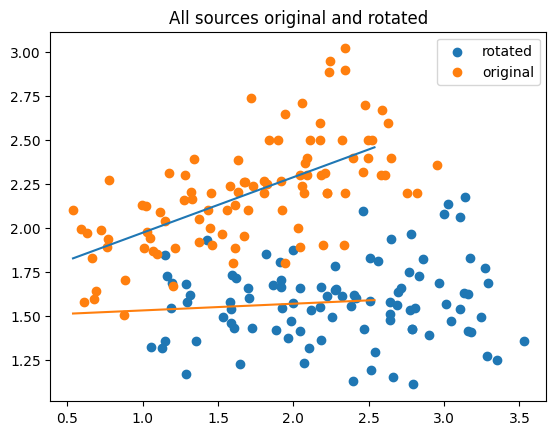

In [186]:
theta_all = math.degrees(math.atan(slope_all))
all_rotated_points = rotate(np.array([log_all_fluxes, all_spectral_indices]).T, -theta_all)
plt.scatter(all_rotated_points[:,0], all_rotated_points[:,1], label='rotated')
print(shapiro(all_rotated_points[:,1]))
print(shapiro(all_spectral_indices))
plt.scatter(log_all_fluxes, all_spectral_indices, label='original')
plt.legend()
print("Anderson test rotated: ", anderson(all_rotated_points[:,1]))
print("Anderson test original: ", anderson(all_spectral_indices))
plt.title('All sources original and rotated')
plt.plot(x, mymodel_all)

slope_all_rotated, intercept_all_rotated, r_all_rotated, p_all_rotated, std_err_all_rotated = linregress(all_rotated_points[:,0], all_rotated_points[:,1])

def myfunc(x):
  return slope_all_rotated * x + intercept_all_rotated

mymodel_all_rotated = list(map(myfunc, x))
plt.plot(x, mymodel_all_rotated)
print(slope_all_rotated)

In [187]:
from tabulate import tabulate
print(tabulate([['Upper-Sco', slope, intercept, r, p, std_err], ['All sources', slope_all, intercept_all, r_all, p_all, std_err_all], ['All sources rotated', slope_all_rotated, intercept_all_rotated, r_all_rotated, p_all_rotated, std_err_all_rotated]], headers=['Source', 'Slope', 'Intercept', 'R', 'P', 'Std_err']))

Source                   Slope    Intercept         R            P    Std_err
-------------------  ---------  -----------  --------  -----------  ---------
Upper-Sco            0.427853       1.53963  0.73835   3.80123e-05  0.0833203
All sources          0.316034       1.65673  0.634876  2.87937e-12  0.0394589
All sources rotated  0.0381758      1.49219  0.10984   0.284161     0.0354429
